In [2]:
import os
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


In [3]:
def warmUp():
    A=np.eye(5)
    print(A)
    return A

In [4]:
warmUp()

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [103]:
data = np.loadtxt('ex1data1.txt', delimiter=',')

In [104]:
data


array([[ 6.1101 , 17.592  ],
       [ 5.5277 ,  9.1302 ],
       [ 8.5186 , 13.662  ],
       [ 7.0032 , 11.854  ],
       [ 5.8598 ,  6.8233 ],
       [ 8.3829 , 11.886  ],
       [ 7.4764 ,  4.3483 ],
       [ 8.5781 , 12.     ],
       [ 6.4862 ,  6.5987 ],
       [ 5.0546 ,  3.8166 ],
       [ 5.7107 ,  3.2522 ],
       [14.164  , 15.505  ],
       [ 5.734  ,  3.1551 ],
       [ 8.4084 ,  7.2258 ],
       [ 5.6407 ,  0.71618],
       [ 5.3794 ,  3.5129 ],
       [ 6.3654 ,  5.3048 ],
       [ 5.1301 ,  0.56077],
       [ 6.4296 ,  3.6518 ],
       [ 7.0708 ,  5.3893 ],
       [ 6.1891 ,  3.1386 ],
       [20.27   , 21.767  ],
       [ 5.4901 ,  4.263  ],
       [ 6.3261 ,  5.1875 ],
       [ 5.5649 ,  3.0825 ],
       [18.945  , 22.638  ],
       [12.828  , 13.501  ],
       [10.957  ,  7.0467 ],
       [13.176  , 14.692  ],
       [22.203  , 24.147  ],
       [ 5.2524 , -1.22   ],
       [ 6.5894 ,  5.9966 ],
       [ 9.2482 , 12.134  ],
       [ 5.8918 ,  1.8495 ],
       [ 8.211

In [105]:
X=data[:,0]
y=data[:,1]

In [106]:
m=y.size

In [107]:
def plotData(x,y):
    fig=pyplot.figure()
    pyplot.plot(x,y,'ro',ms=10,mec='k')
    pyplot.xlabel('profit in $10000')
    pyplot.ylabel('population of cities in 10,000s')

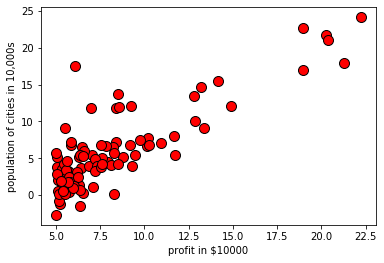

In [108]:
plotData(X,y)

In [109]:
X1=np.stack([np.ones(m),X],axis=0)
X2=np.stack([np.ones(m),X],axis=1)
#X3=np.stack([np.ones(m),X],axis=2)

In [110]:
X=X2
def computeCost(X,y,theta):
    m=y.size
    J=0
    h=np.dot(X,theta)
    J=(1/(2*m))*np.sum(np.square(np.dot(X,theta)-y))
    return J

In [111]:
J=computeCost(X,y,theta=np.array([0.0,0.0]))
print("with theta = [0,0]: ", J)
print('Expected cost value approx : 32.07')
J=computeCost(X,y,theta=np.array([-1,2]))
print("with theta = [0,0]: cost computed ", J)
print('Expected cost value approx : 54.24')


with theta = [0,0]:  32.072733877455676
Expected cost value approx : 32.07
with theta = [0,0]: cost computed  54.24245508201238
Expected cost value approx : 54.24


In [112]:
def gradDescent(X,y,theta,alpha,num_iters):
    m=y.size
    J_history=[]
    theta=theta.copy()
    for i in range(num_iters):
        theta=theta-(alpha/m)*(np.dot(X,theta)-y).dot(X)
        J_history.append(computeCost(X,y,theta))
    return theta, J_history

In [113]:
theta=np.zeros(2)
iterations=1500
alpha=0.01
theta, J_history=gradDescent(X,y,theta,alpha,iterations)
print("theta final after various iterations ", theta)

theta final after various iterations  [-3.63029144  1.16636235]


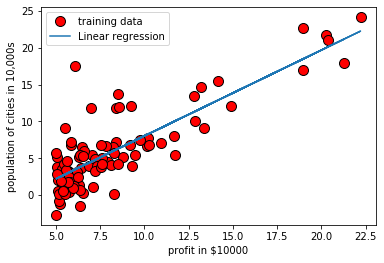

In [114]:
plotData(X[:,1],y)
pyplot.plot(X[:,1],np.dot(X,theta),'-')
pyplot.legend(['training data ', 'Linear regression'])

In [115]:
predict1=np.dot([1,3.5],theta)
print('for population 35000, profit estimated: ',predict1*10000)
predict1=np.dot([1,7],theta)
print('for population 70000, profit estimated: ',predict1*10000)


for population 35000, profit estimated:  4519.7678677017675
for population 70000, profit estimated:  45342.45012944714


[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.      7

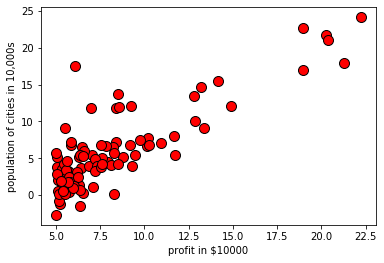

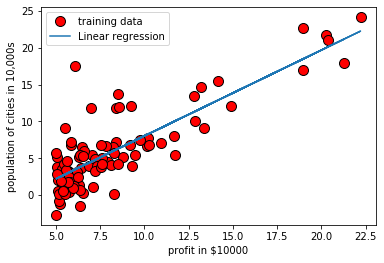

In [127]:
datar=np.loadtxt('ex1data1.txt',delimiter=',')
Xr=datar[:,0]
yr=datar[:,1]
m1=yr.size
plotData(Xr,yr)
Xr=np.stack((np.ones(m1),Xr),axis=1)
print(Xr)
def costFuncr(Xr,yr,thetar):
    J=0
    mr=yr.size
    J=(1/(2*mr))*(np.sum(np.square(np.dot(Xr,thetar)-yr)))
    return J
def gradDescentr(Xr,yr,thetar,alpha,num_iters):
    J_history=[]
    mr=yr.size
    print(Xr.shape)
    print(thetar.shape)
    for i in range(num_iters):
        thetar-=(alpha/m)*(np.dot(Xr,thetar)-yr).dot(Xr)
        J_history.append(costFuncr(Xr,yr,thetar))
    print(thetar)
    return  J_history
thetar=np.zeros(2)
print(thetar.shape)
iterationr=1500
alphar=0.01
J_history = gradDescentr(Xr,yr,thetar,alphar,iterationr)
print("value of theta array : ",thetar)

plotData(X[:,1],y)
pyplot.plot(X[:,1],np.dot(X,theta),'-')
pyplot.legend(['training data ', 'Linear regression'])
predict1=np.dot([1,3.5],theta)
print('for population 35000, profit estimated: ',predict1*10000)
predict1=np.dot([1,7],theta)
print('for population 70000, profit estimated: ',predict1*10000)

    

In [ ]:
#theta0_vals=np.linspace(-10,10,100)
#theta1_vals=np.linspace(-1,4,100)
#J_vals=np.zeros((theta0_vals.shape[0],theta1_vals.shape[0]))
#for i,theta0 in enumerate(theta0_vals):
 #   for j,theta1 in enumerate(theta1_vals):
  #      j_vals[i,j]=costFuncr(Xr,yr,[theta0,theta1])
#Learn surface plots and Contour plots
#check about representation [theta0,theta1]

In [ ]:
####MULTI VARIATE LINEAR REGRESSION
import os
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
%matplotlib inline
data2=np.loadtxt('ex1data2.txt',delimiter=',')
#data2
X=data2[:,0:2]
y=data2[:,2]
#print(X)
#print(y)
print(X.shape[1])
m=y.size
def plotData(X,y):
    for i in range(X.shape[1]):
        fig=pyplot.figure()
        pyplot.plot(X[:,i],y,'ro',ms=10,mec='k')
        pyplot.ylabel('Value')
        pyplot.xlabel('Attribute: ')
plotData(X,y)
def featureNormalize(X):
    X_norm=X.copy()
    mu=np.zeros(X.shape[1])
    sigma=np.zeros(X.shape[1])
    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0)
    X_norm=(X-mu)/sigma
    return X_norm,mu,sigma
X_norm,mu,sigma=featureNormalize(X)
print(X_norm)
print(mu)
print(sigma)
def computeCost(X_new,y,theta):
    J=0
    theta=theta.copy()
    m=y.size
    h=np.dot(X_new,theta)
    J=(1/(2*m))*np.sum(np.square(h-y))
    return J
def gradientDescent(X_new,y,theta,alpha,num_of_iters):
    J_history=[]
    m=y.size
    for i in range(num_of_iters):
        theta=theta-(alpha/m)*(np.dot(X_new,theta)-y).dot(X_new)
        J_history.append(computeCost(X_new,y,theta))
    return theta, J_history
X_new=np.ones((X.shape[0],X.shape[1]+1))
X_new[:,1:]=X_norm
print(X_new)
iterations=500
alpha=0.01
theta=np.zeros(X_new.shape[1])
print("assigned theta: ",theta)
theta, J_history=gradientDescent(X_new,y,theta,alpha,iterations)
print(J_history)
print("Theta final: ", theta)
pyplot.plot(np.arange(len(J_history)),J_history,lw=2)
pyplot.xlabel('number of iteration')
pyplot.ylabel('cost value')
iterations=500
alpha=0.1
theta=np.zeros(X_new.shape[1])
print("assigned theta: ",theta)
theta, J_history=gradientDescent(X_new,y,theta,alpha,iterations)
print(J_history)
print("Theta final: ", theta)
pyplot.plot(np.arange(len(J_history)),J_history,lw=3)
pyplot.xlabel('number of iteration')
pyplot.ylabel('cost value')
X_array=[1,1650,3]
X_array[1:3]=(X_array[1:3]-mu)/sigma
print(np.dot(X_array,theta))
